In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
import ssl, re
ssl._create_default_https_context = ssl._create_unverified_context
pd.__version__

'0.25.3'

In [4]:
# on Github, open CSV file and click on 'Raw'. Copy URL

filename = 'time_series_19-covid-Confirmed.csv'
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+filename
ts_df = pd.read_csv(data_url)
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Diamond Princess', x) is not None)]
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Grand Princess', x) is not None)]
ts_df = ts_df.sort_values(['Country/Region', 'Province/State'])
print(ts_df['Country/Region'].unique())
display(ts_df)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon'
 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
26,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,11,16,21,22,22,22,24,24,40,40.0
95,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,89.0
29,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,37,48,54,60,74,87,90,139,201,201.0
60,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,113.0
470,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,0,1,6,10,15,23,33,43,43,43.0
421,NaN,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,...,2,10,17,33,36,42,42,70,70,70.0
191,NaN,Vietnam,16.0000,108.0000,0,2,2,2,2,2,...,53,56,61,66,75,85,91,94,113,113.0
456,NaN,Zambia,-15.4167,28.2833,0,0,0,0,0,0,...,0,0,0,0,2,2,2,2,3,3.0


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

lin_df = ts_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
lin_df = lin_df.groupby('Country/Region').sum().transpose()
lin_df['date_count'] = [i for i in range(lin_df.shape[0])]
display(lin_df.tail(7))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominica,Dominican Republic,East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,French Guiana,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of the Congo,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,date_count
3/17/20,22.0,55.0,60.0,39.0,0.0,1.0,68.0,78.0,452.0,1332.0,28.0,1.0,228.0,10.0,2.0,36.0,1243.0,1.0,1.0,11.0,26.0,321.0,56.0,67.0,15.0,0.0,33.0,10.0,470.0,0.0,1.0,0.0,201.0,81058.0,65.0,1.0,3.0,41.0,5.0,65.0,5.0,46.0,396.0,1025.0,0.0,0.0,21.0,0.0,58.0,196.0,0.0,1.0,0.0,225.0,1.0,5.0,0.0,321.0,7699.0,0.0,1.0,1.0,34.0,9257.0,7.0,387.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,7.0,0.0,1.0,8.0,50.0,220.0,142.0,172.0,16169.0,154.0,223.0,337.0,31506.0,12.0,878.0,0.0,34.0,33.0,3.0,8320.0,2.0,130.0,0.0,49.0,120.0,1.0,7.0,25.0,140.0,0.0,673.0,13.0,38.0,16.0,1.0,0.0,0.0,82.0,30.0,7.0,5.0,2.0,38.0,0.0,2.0,1.0,1711.0,12.0,0.0,0.0,3.0,26.0,1463.0,24.0,236.0,69.0,0.0,9.0,117.0,187.0,238.0,448.0,0.0,439.0,0.0,0.0,184.0,114.0,7.0,2.0,1.0,109.0,171.0,26.0,65.0,4.0,266.0,72.0,275.0,1.0,62.0,11748.0,44.0,1.0,1.0,1190.0,2700.0,0.0,77.0,1.0,177.0,0.0,0.0,0.0,1.0,5.0,24.0,47.0,6353.0,0.0,14.0,98.0,1960.0,29.0,10.0,33.0,66.0,0.0,0.0,55
3/18/20,22.0,59.0,74.0,39.0,0.0,1.0,79.0,84.0,568.0,1646.0,28.0,1.0,256.0,14.0,2.0,51.0,1486.0,2.0,1.0,12.0,38.0,372.0,68.0,92.0,20.0,0.0,35.0,10.0,648.0,0.0,1.0,0.0,238.0,81102.0,93.0,1.0,4.0,50.0,6.0,81.0,7.0,49.0,464.0,1116.0,1.0,0.0,21.0,0.0,111.0,196.0,0.0,4.0,0.0,258.0,1.0,6.0,0.0,336.0,9105.0,0.0,1.0,1.0,38.0,12327.0,7.0,418.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,7.0,0.0,1.0,9.0,58.0,250.0,156.0,227.0,17361.0,164.0,292.0,433.0,35713.0,13.0,889.0,0.0,52.0,35.0,3.0,8413.0,2.0,142.0,3.0,71.0,133.0,2.0,28.0,27.0,203.0,0.0,790.0,13.0,38.0,19.0,1.0,3.0,0.0,93.0,30.0,7.0,6.0,1.0,49.0,0.0,2.0,1.0,2058.0,20.0,0.0,0.0,8.0,35.0,1550.0,39.0,299.0,86.0,0.0,11.0,145.0,202.0,251.0,448.0,0.0,452.0,0.0,0.0,260.0,147.0,8.0,2.0,1.0,119.0,171.0,31.0,83.0,4.0,313.0,105.0,275.0,1.0,116.0,13910.0,51.0,2.0,1.0,1279.0,3028.0,0.0,100.0,3.0,212.0,0.0,0.0,0.0,1.0,7.0,29.0,98.0,7715.0,0.0,14.0,113.0,2642.0,50.0,15.0,36.0,75.0,2.0,0.0,56
3/19/20,22.0,64.0,87.0,53.0,0.0,1.0,97.0,115.0,681.0,2013.0,44.0,3.0,278.0,17.0,5.0,51.0,1795.0,2.0,1.0,12.0,63.0,621.0,75.0,94.0,33.0,0.0,37.0,13.0,791.0,0.0,1.0,1.0,238.0,81156.0,102.0,3.0,14.0,69.0,9.0,105.0,11.0,67.0,694.0,1225.0,1.0,0.0,34.0,0.0,199.0,256.0,1.0,6.0,0.0,267.0,1.0,6.0,1.0,400.0,10947.0,0.0,1.0,1.0,40.0,15320.0,11.0,418.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,7.0,0.0,1.0,12.0,73.0,330.0,194.0,311.0,1

In [6]:
log_df = lin_df.copy()
log_df[log_df == 0] = 1e-5
log_df = np.log(log_df)
log_df[log_df < 0.1] = 0.0
log_df.date_count = lin_df.date_count
display(log_df.head(4))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Cape Verde,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominica,Dominican Republic,East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,French Guiana,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of the Congo,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe,date_count
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.306275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.466145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,1
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.824374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Country/Region,date_count,US,Italy,"Korea, South",Germany,France,Iran
3/17/20,55,6353.0,31506.0,8320.0,9257.0,7699.0,16169.0
3/18/20,56,7715.0,35713.0,8413.0,12327.0,9105.0,17361.0
3/19/20,57,13608.0,41035.0,8565.0,15320.0,10947.0,18407.0
3/20/20,58,19028.0,47021.0,8652.0,19848.0,12726.0,19644.0
3/21/20,59,25417.0,53578.0,8799.0,22213.0,14431.0,20610.0
3/22/20,60,33193.0,59138.0,8897.0,24873.0,16176.0,21638.0
3/23/20,61,33197.0,59138.0,8897.0,24873.0,16044.0,21638.0


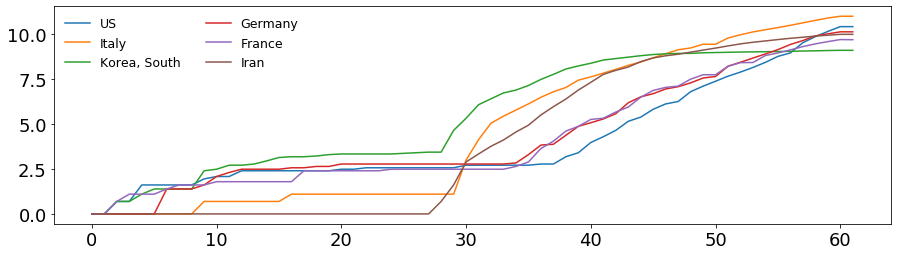

In [7]:
countries = ['Mainland China', 'US', 'Italy', 'Korea, South', 'Germany']
countries = ['US', 'Italy', 'Korea, South', 'Germany', 'France', 'Iran']
display(lin_df[['date_count'] + countries].tail(7))

fig, ax = plt.subplots(figsize=(15, 4))
for country in countries:
    ax.plot(log_df.date_count, log_df[country], label=country)
ax.legend(frameon=False, ncol=2, fontsize='x-small')

,date_count,US
53,53,3432
54,54,4565
55,55,6353
56,56,7715
57,57,13608
58,58,19028
59,59,25417
60,60,33193
61,61,46100
62,62,55100


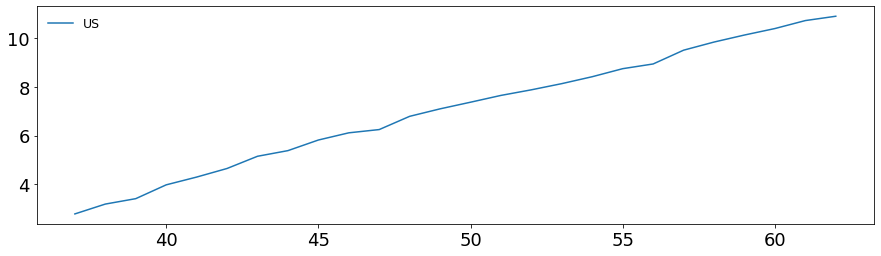

In [28]:
country = 'US'
us_df = lin_df[['date_count', country]]
mat = us_df.values.astype(np.int)
mat = mat[mat[:, 0] < 61]
mat = np.r_[mat,
            np.array([[61, 46100]]), # 3/23
            np.array([[62, 55100]])] # 3/24
us_df = pd.DataFrame(mat, columns=['date_count', country])
us_df = us_df[us_df.date_count >= 37]
log_us_df = np.c_[us_df.date_count.values, np.log(us_df[country])]
log_us_df = pd.DataFrame(log_us_df, columns=['date_count', country])
display(us_df.tail(10))

fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(log_us_df['date_count'], log_us_df[country], label=country)
ax.legend(frameon=False, ncol=2, fontsize='x-small')

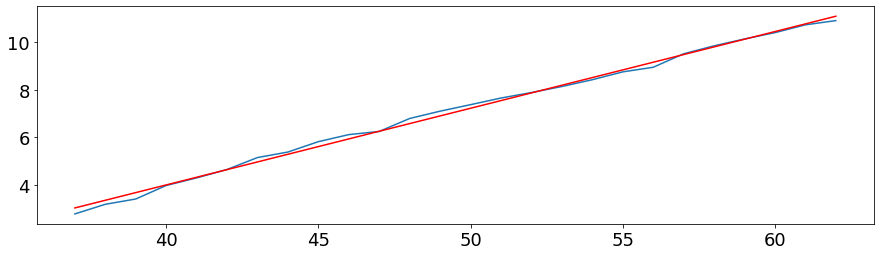

[[0.32306564]]


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = log_us_df.date_count.values.reshape(-1, 1)
y = log_us_df[country].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_fit = lin_reg.predict(x)

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()
print(lin_reg.coef_)

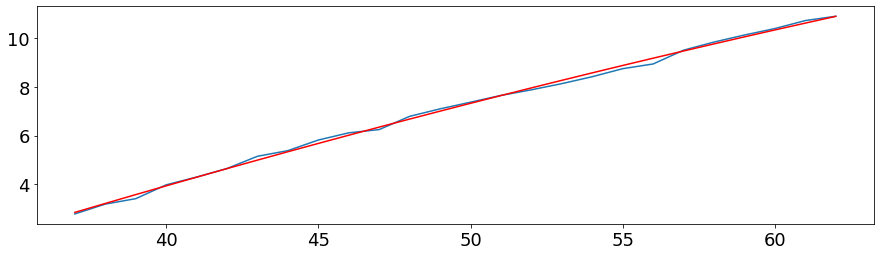

In [30]:
x = log_us_df.date_count.values.reshape(-1, 1)
x2 = x * x
y = log_us_df[country].values.reshape(-1, 1)
qua_reg = LinearRegression()
qua_reg.fit(np.c_[x, x2], y)
y_fit = qua_reg.predict(np.c_[x, x2])

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [31]:
regressor = qua_reg

x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
if regressor == qua_reg:
    y_fut = regressor.predict(np.c_[x_fut, x_fut*x_fut])
else:
    y_fut = regressor.predict(x_fut)
print(y_fut)
y_fut = np.exp(y_fut)
mat = np.c_[x_fut, y_fut].astype(int)
print(mat)

[[10.91184833]
 [11.18572543]
 [11.4558188 ]
 [11.72212843]
 [11.98465433]
 [12.24339649]
 [12.49835492]
 [12.74952962]
 [12.99692058]
 [13.24052781]
 [13.4803513 ]
 [13.71639107]
 [13.94864709]
 [14.17711939]
 [14.40180795]
 [14.62271277]
 [14.83983386]
 [15.05317122]
 [15.26272484]
 [15.46849473]
 [15.67048089]
 [15.86868331]
 [16.063102  ]
 [16.25373695]
 [16.44058818]
 [16.62365566]]
[[      62    54822]
 [      63    72093]
 [      64    94449]
 [      65   123269]
 [      66   160276]
 [      67   207605]
 [      68   267896]
 [      69   344389]
 [      70   441053]
 [      71   562714]
 [      72   715224]
 [      73   905634]
 [      74  1142405]
 [      75  1435637]
 [      76  1797321]
 [      77  2241627]
 [      78  2785210]
 [      79  3447539]
 [      80  4251255]
 [      81  5222541]
 [      82  6391508]
 [      83  7792585]
 [      84  9464911]
 [      85 11452710]
 [      86 13805645]
 [      87 16579137]]
